In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Section 1. Load and Visualise the data
- Download 
- load
- visualise
- normalisation

In [2]:
#load
x_train = pd.read_csv('dataset/Linear_X_Train.csv')
y_train = pd.read_csv('dataset/Linear_Y_Train.csv')

print(x_train.shape)
print(x_train.head())
print(y_train.head())

(3750, 1)
          x
0 -0.289307
1 -0.588810
2  1.027507
3 -0.259013
4  0.782043
           y
0  -0.091101
1 -53.467721
2  75.457009
3 -12.025286
4  57.414187


In [3]:
type(x_train)

pandas.core.frame.DataFrame

In [4]:
# conver x and y into numpy arrays
x_train = x_train.values
y_train = y_train.values

#normalisation
u = x_train.mean()
std = x_train.std()

x_train = (x_train - u)/std

C:\Users\Dell\AppData\Local\Temp\ipykernel_6544\3683989184.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


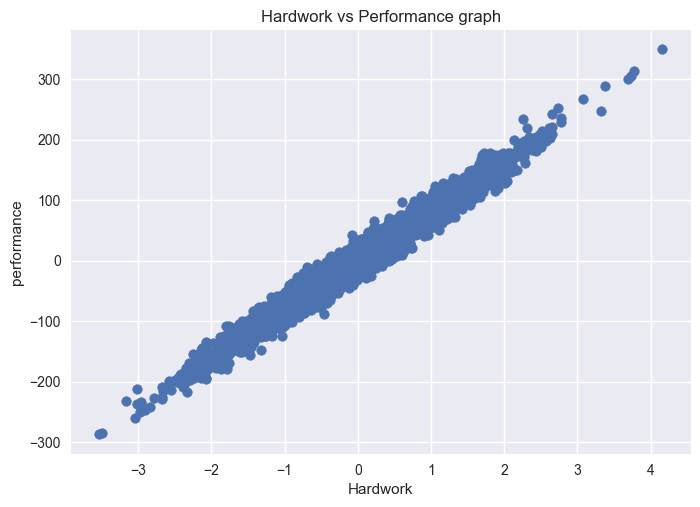

In [5]:
#visualize
plt.style.use('seaborn')
plt.scatter(x_train , y_train )
plt.title("Hardwork vs Performance graph")
plt.xlabel("Hardwork")
plt.ylabel("performance")
plt.show()

## Section 2 - Linear Regression

In [6]:
def hypothesis(x, theta):
    
    # theta = [theta0 , theta1]
    y_ = theta[0] + theta[1]*x
    return y_


def gradient(X, Y , theta):
    
    m = X.shape[0]
    grad = np.zeros((2,))
    
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        x = X[i]
        
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)* x
    
    return grad/m

def lossFunction(X, Y , theta):
   
    m = X.shape[0]
    loss = 0.0

    
    for i in range(m):  
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x, theta)
        loss += (y_ - y)**2
        
    return loss/m

def gradientDescent(X, Y ,max_steps = 100, learning_rate = 0.1):
    
    theta_list = []
    loss_list = []
    theta = np.zeros((2,))
    
    
    for i in range(max_steps):
        
        #compute grad
        grad = gradient(X, Y , theta)
        loss = lossFunction(X,Y,theta)
        
        
        #update theta
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
         
        #storing the theta values during updates
        theta_list.append((theta[0], theta[1]))
        loss_list.append(loss)
    return theta,loss_list, theta_list

        
        
    

In [7]:
theta , loss_list , theta_list= gradientDescent(x_train, y_train)

C:\Users\Dell\AppData\Local\Temp\ipykernel_6544\2260817121.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6544\2260817121.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)* x


In [8]:
theta 

array([ 0.6838508 , 79.90361453])

In [9]:
loss_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

Text(0.5, 1.0, 'Loss decreases over the iteration')

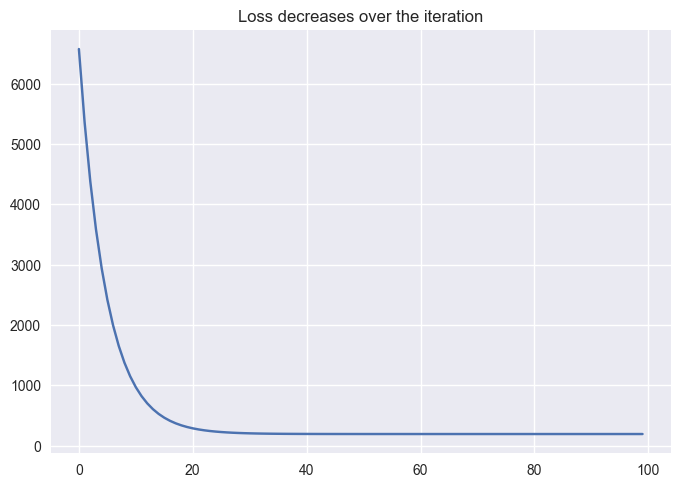

In [10]:
plt.plot(loss_list)
plt.title('Loss decreases over the iteration')

## Section 3 Predictions and Best Line

In [11]:
y_ = hypothesis(x_train, theta)
y_

array([[-19.5733619 ],
       [-43.69571729],
       [ 86.4848761 ],
       ...,
       [-20.85044708],
       [138.70197319],
       [-35.87897262]])

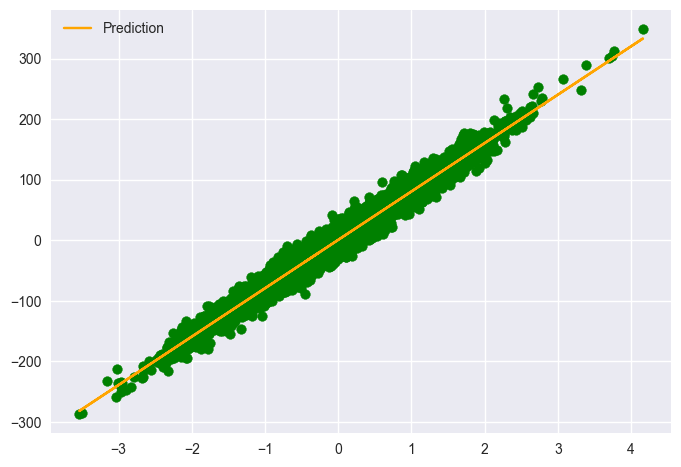

In [12]:
plt.scatter(x_train, y_train , color = 'green')
plt.plot(x_train, y_ , color = 'orange' , label = 'Prediction')
plt.legend()
plt.show()

In [13]:
# Load the test data
x_test = pd.read_csv('dataset/Linear_X_Test.csv').values
y_test = hypothesis(x_test, theta)

y_test.shape

(1250, 1)

In [14]:
df = pd.DataFrame(y_test , columns = ['y'])

In [15]:
df.to_csv('dataset/y_prediction.csv', index = False)

## Section 4 Computing Score

In [16]:
def r2score(y , y_):
    
    # instead of loop , np.sum is used 
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    
    score = (1- num/denom)
    return score*100

In [17]:
r2score(y_train, y_)

97.09612226971643

## Section-5 Visualising loss function , Gradient Descent, Theta Updates

In [18]:
from mpl_toolkits.mplot3d import Axes3D


In [19]:
theta

array([ 0.6838508 , 79.90361453])

In [33]:
# loss actually
t0 = np.arange(-40 , 40 , 1)
t1 = np.arange(40, 120, 1)

t0, t1 = np.meshgrid(t0, t1)
J = np.zeros(t0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = t1[i,j]*x_train + t0[i,j]
        J[i,j] =  np.sum((y_train-y_)**2)/y_train.shape[0]
        
# print(t0, t1)

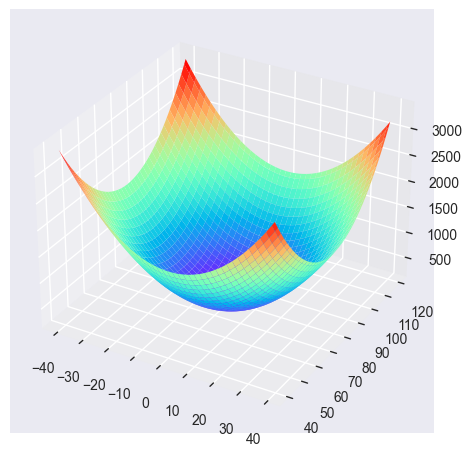

In [34]:
# visualise the J(Loss)

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(t0, t1,J, cmap = 'rainbow')
plt.show()

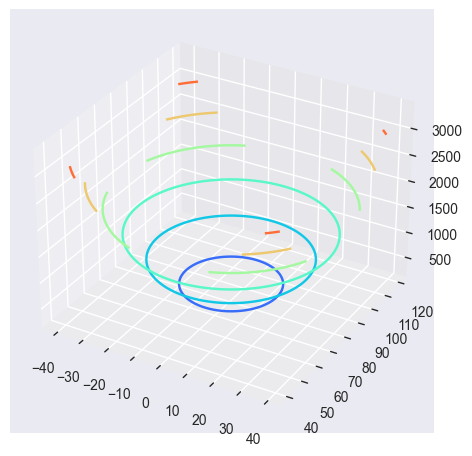

In [35]:
# contour plot

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(t0, t1,J, cmap = 'rainbow')
plt.show()

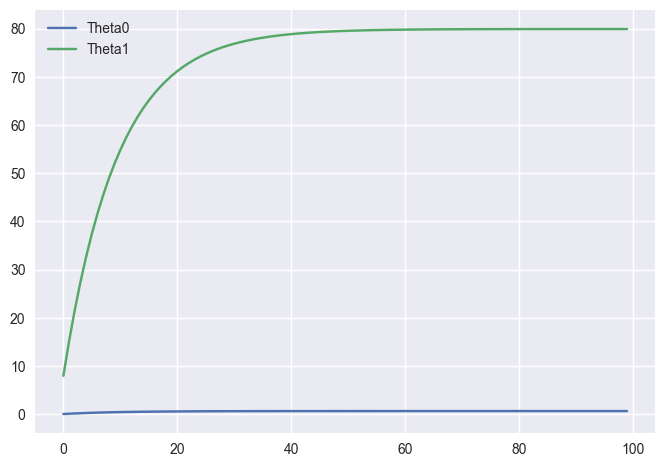

In [36]:
# visualising theta updated at every iteration 
theta_list = np.array(theta_list)

plt.plot(theta_list[:, 0], label = 'Theta0')
plt.plot(theta_list[:,1], label = 'Theta1')
plt.legend()
plt.show()

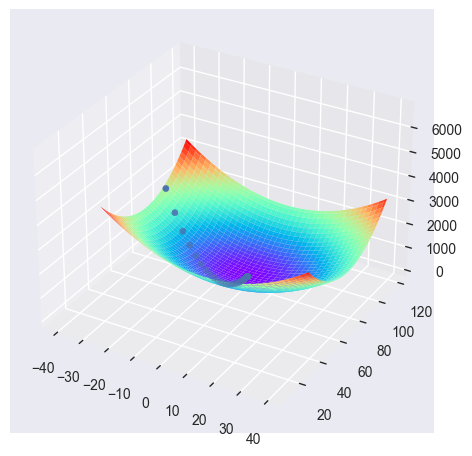

In [37]:
# trajectory traces by theta updates in loss function

fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(t0, t1,J, cmap = 'rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], loss_list)
plt.show()

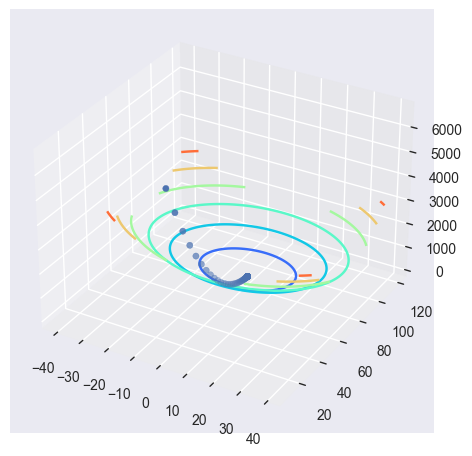

In [38]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(t0, t1,J, cmap = 'rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], loss_list)
plt.show()

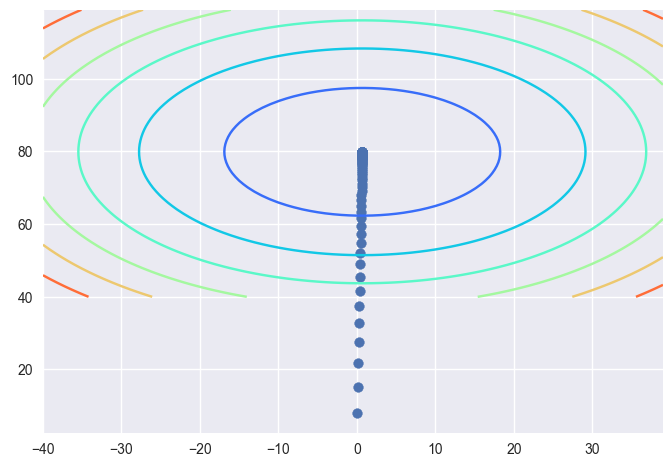

In [41]:
# 2d contour plot |  top view

plt.contour(t0, t1, J , cmap = 'rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()

In [42]:
np.save('thetalist.npy', theta_list)

In [41]:
J.shape

(80, 80)